In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
train = pd.read_csv(r"C:\Users\user\Downloads\train_ctrUa4K.csv")
test = pd.read_csv(r"C:\Users\user\Downloads\test_lAUu6dG.csv")

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [57]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


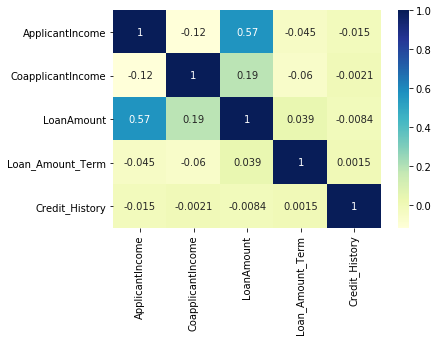

In [11]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix,annot= True, cmap = 'YlGnBu')
plt.show()

In [12]:
train['Loan_Status'] = train['Loan_Status'].replace('N',0)
train['Loan_Status'] = train['Loan_Status'].replace('Y',1)

In [13]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [58]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [15]:
x = train.drop('Loan_Status',axis = 1) 
y = train['Loan_Status']

In [59]:
x=pd.get_dummies(x) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.20,random_state= 30)

In [18]:
from sklearn.linear_model import LogisticRegression 
model_1= LogisticRegression() 
model_1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
prediction_1 = model_1.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction_1)

0.7804878048780488

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

models = [['LogisticRegression ', LogisticRegression()],
        ['DecisionTreeClassifier ', DecisionTreeClassifier()],
        ['RandomForestClassifier ', RandomForestClassifier()],
        ['KNeighborsClassifier ', KNeighborsClassifier()],
         ['SVC ', SVC()]]

In [22]:
for name, model in models:
    model = model
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    print(name, accuracy_score(y_test, prediction))

LogisticRegression  0.7804878048780488
DecisionTreeClassifier  0.6260162601626016
RandomForestClassifier  0.7398373983739838
KNeighborsClassifier  0.6016260162601627
SVC  0.6910569105691057


In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
penalty = ['l1', 'l2'],
solver = ['liblinear', 'solver'],
C = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
max_iter= [int(x) for x in np.linspace(start=200, stop=2000, num=5)]

In [34]:
logistic_grid = {'penalty':penalty,
               'solver' :solver,
               'C' : C,
               'max_iter' : max_iter}

In [35]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]

In [36]:
random_grid = {'n_estimators':n_estimators,
               'max_features' :max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion': ['entropy','gini','log_loss']}

In [38]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,
                                 n_iter = 100, cv=3, verbose=2,random_state=100, n_jobs=-1)
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [40]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 890,
 'criterion': 'gini'}

In [41]:
rf_randomcv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=890, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
best_random = rf_randomcv.best_estimator_

In [46]:
prediction_2 = best_random.predict(x_test)
print(confusion_matrix(y_test,prediction_2))
print(accuracy_score(y_test,prediction_2))
print(classification_report(y_test,prediction_2))

[[13 24]
 [ 2 84]]
0.7886178861788617
              precision    recall  f1-score   support

           0       0.87      0.35      0.50        37
           1       0.78      0.98      0.87        86

    accuracy                           0.79       123
   macro avg       0.82      0.66      0.68       123
weighted avg       0.80      0.79      0.76       123



In [ ]:
y_test1 = test
prediction_2 = model_1.predict(y_test1)

In [39]:
submission = pd.read_csv(r"C:\Users\user\Downloads\sample_submission_49d68Cx.csv")

In [50]:
submission.shape

(367, 2)

In [49]:
submission['Loan_Status'] = prediction_2
submission.to_csv('sample_submission.csv', index=False)

ValueError: Length of values does not match length of index